<a href="https://colab.research.google.com/github/HerbertLuan/DataSciencePortfolio/blob/main/S%C3%A9rie_Temporal_Di%C3%A1ria_do_Clima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Série Temporal Diária do Clima**
===
![clima-x-tempo.jpg](https://blog4.mfrural.com.br/wp-content/uploads/2020/02/clima-x-tempo.jpg)

**O que é uma série temporal?**
---
Em estatística, econometria, matemática aplicada e processamento de sinais, uma série temporal é uma coleção de observações feitas sequencialmente ao longo do tempo.

**Objetivo Geral**
---
Neste projeto, iremos analisar um dataset de série temporal do clima. Primeiro, faremos um datamining, com o objetivo de procurar informações relevantes na base de dados. Posteriormente, ultilizaremos algoritmos de machine learning para prever temperaturas dos anos seguintes.

**Base de Dados**
---
O conjunto de dados é totalmente dedicado aos desenvolvedores que desejam treinar o modelo em previsão do tempo para o clima indiano. Este conjunto de dados fornece dados de 1º de janeiro de 2013 a 24 de abril de 2017 na cidade de Delhi, Índia. Os 4 parâmetros aqui são
temperatura média, umidade, velocidade do vento, pressão média.

# **1. Análise Explorátória**

In [ ]:
#Carregando Bibliotecas

#Manipular o dataframe
import pandas as pd
import numpy as np

#Visualização
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Carregando a base de dados
dados = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Science/Portifólio/Clima/DailyDelhiClimateTrain.csv')
dados.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


Como podemos ver, a base é composta por 5 colunas, sendo elas: 

* **Data:** No formato AAAA-MM-DD 

* **Temperatura média:** A temperatura média foi calculada a partir de vários intervalos de 3 horas em um dia. (Unidade: °C).

* **Umidade:** Valor de umidade para o dia. (Unidade: gramas de vapor de água por metro cúbico de volume de ar).

* **Velocidade do vento:** (Unidade: km/h).

* **Pressão média:** Pressão do ar. (Unidade: atm).

Além disso, temos 1462 registros na base de dados e, desses, nenhum apresenta valor nulo.

In [ ]:
print(f'Quantidade de linhas e colunas: {dados.shape}')
print(f'Quantidade de dados nulos: {dados.isna().sum().sum()}')

Quantidade de linhas e colunas: (1462, 5)
Quantidade de dados nulos: 0


Todas as colunas são compostas por valores do tipo float, exceto a coluna data, que é composta por valores object. Para facilitar os futuros trabalhos, iremos converter a coluna para o formato datetime. Faremos a conversão utilizando a função to_datetime(), do pandas.

In [ ]:
print(dados.dtypes)
print('\nConvertendo\n')
dados['date'] = pd.to_datetime(dados['date'])
print(dados.dtypes)

date             object
meantemp        float64
humidity        float64
wind_speed      float64
meanpressure    float64
dtype: object

Convertendo

date            datetime64[ns]
meantemp               float64
humidity               float64
wind_speed             float64
meanpressure           float64
dtype: object


## Análise Gráfica

Agora, partiremos para a análise gráfica de algumas variáveis. Para agilizar nosso trabalho, definiremos a nossa função plot.

In [ ]:
def plotar(titulo, labelx, labely, x, y, dataset):
  '''
  titulo: Titulo do gráfico
  labelx: Descrição eixo x
  labely: Descrição eixo y
  x: Variável eixo x
  y: Variável eixo y
  dataset: Base de dados
  '''
  sns.set_palette('Accent')
  sns.set_style('darkgrid')
  ax = sns.lineplot(x=x, y=y, data = dataset)
  ax.figure.set_size_inches(25, 6)
  ax.set_title(titulo, loc = 'center',
              fontsize = 24)
  ax.set_xlabel(labelx, fontsize = 14)
  ax.set_ylabel(labely, fontsize = 14)
  ax = ax

### Temperatura Média

Para está primeira análise, começaremos com a variável temperatura média. 

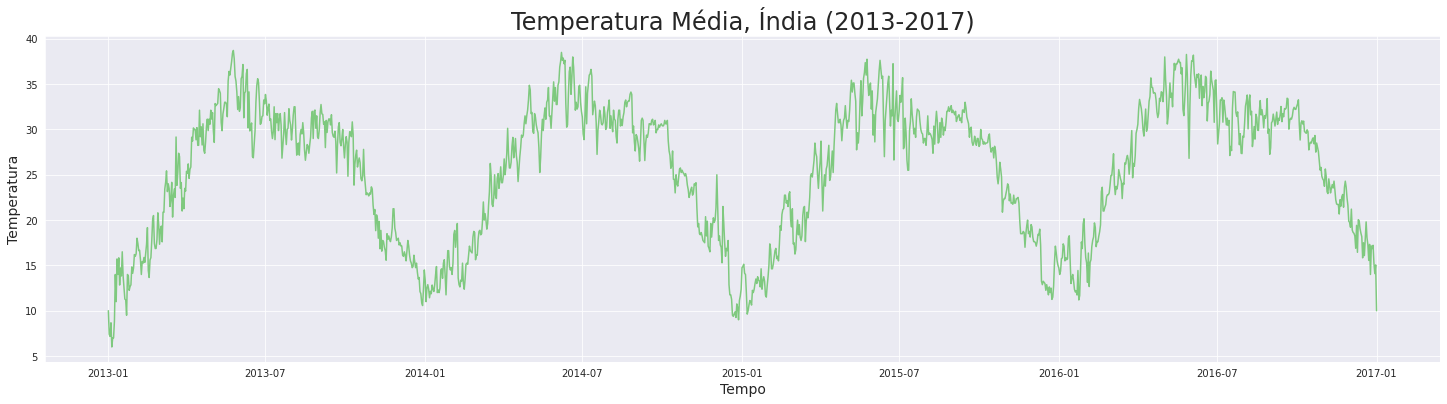

In [ ]:
plotar('Temperatura Média, Índia (2013-2017)','Tempo', 'Temperatura', 'date', 'meantemp', dados)

Como podemos ver, o gráfico apresenta um pouco de ruído, dificultando parcialmente a nossa análise. Sendo assim, ultilizaremos a função rolling() do pandas, junto com a função mean(), com o intuito de "normalizar" o nosso gráfico.

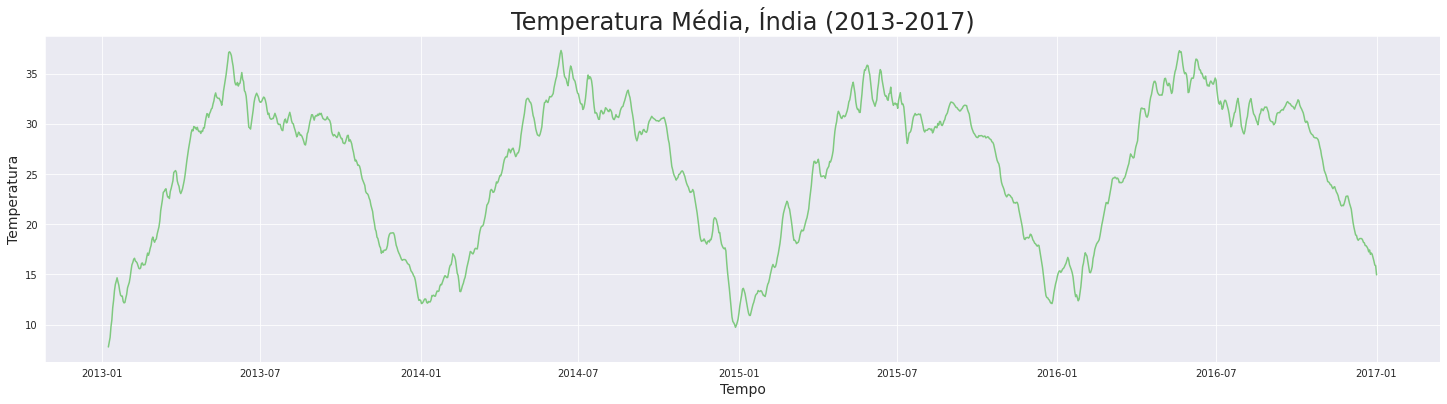

In [ ]:
dados['Temperatura(°C)'] = dados['meantemp'].rolling(8).mean()
plotar('Temperatura Média, Índia (2013-2017)', 'Tempo', 'Temperatura', 'date', 'Temperatura(°C)', dados)

Agora, com o nosso gráfico normalizado, podemos tirar algumas conclusões.

Em um primeiro olhar, conseguimos notar um certo padrão no gráfico. Quando estamos no início do ano, a temperatura bate o seu maior pico, chegando próximo dos 35 °C. Em contrapartida, quando estamos chegando na metade do ano, a temperatura bate o seu menor pico, chegando próximo dos 10 °C.

**Algumas dessas observações nos leva as seguintes perguntas:**


* Por que em janeiro temos records de temperatura?
> Existe algum fator humano que influencie nesse aumento?

* Por que, quando próximo de agosto a temperatura chega em valores tão baixos?
> Novamente, existe algum fator humano que influencie nessa baixa? Ou isso é puramente fator da natureza?

Talvez, com a análise da umidade ou a velocidade do vento, poderemos concluir se a natureza tem influência nisso.


### Umidade, Velocidade do Vento e Pressão Atmosférica.

Para comparar as 4 variáveis juntas, iremos definir a função plot_comparacao, que basicamente irá juntar o gráfico de cada variável em função do tempo, em um único plot.

In [ ]:
def plot_comparacao(x, y1, y2, y3, y4, dataset, titulo):
  plt.figure(figsize = (16,16))
  ax = plt.subplot(4, 1, 1)
  ax.set_title(titulo, fontsize = 20, loc = 'center')
  sns.lineplot(x=x, y=y1, data=dataset)
  plt.subplot(4,1,2)
  sns.lineplot(x=x, y=y2, data=dataset)
  plt.subplot(4,1,3)
  sns.lineplot(x=x, y=y3, data=dataset)
  plt.subplot(4,1,4)
  sns.lineplot(x=x, y=y4, data=dataset)
  ax = ax

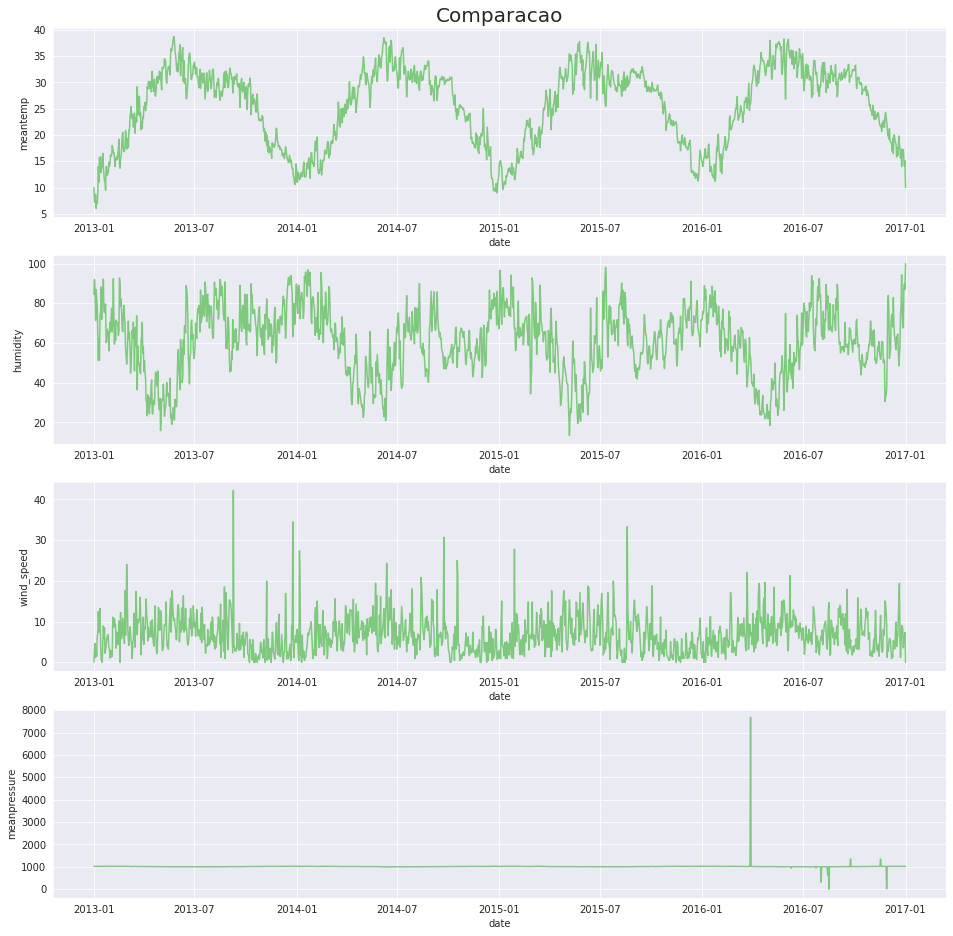

In [ ]:
plot_comparacao('date', 'meantemp', 'humidity', 'wind_speed', 'meanpressure', dados, 'Comparacao')

Novamente, para facilitar a nossa análise. Iremos criar a coluna media movel de cada variável, para assim, "normalizar" o gráfico, removendo parte de seus ruídos. E daí então, refazer o plot_comparacao.

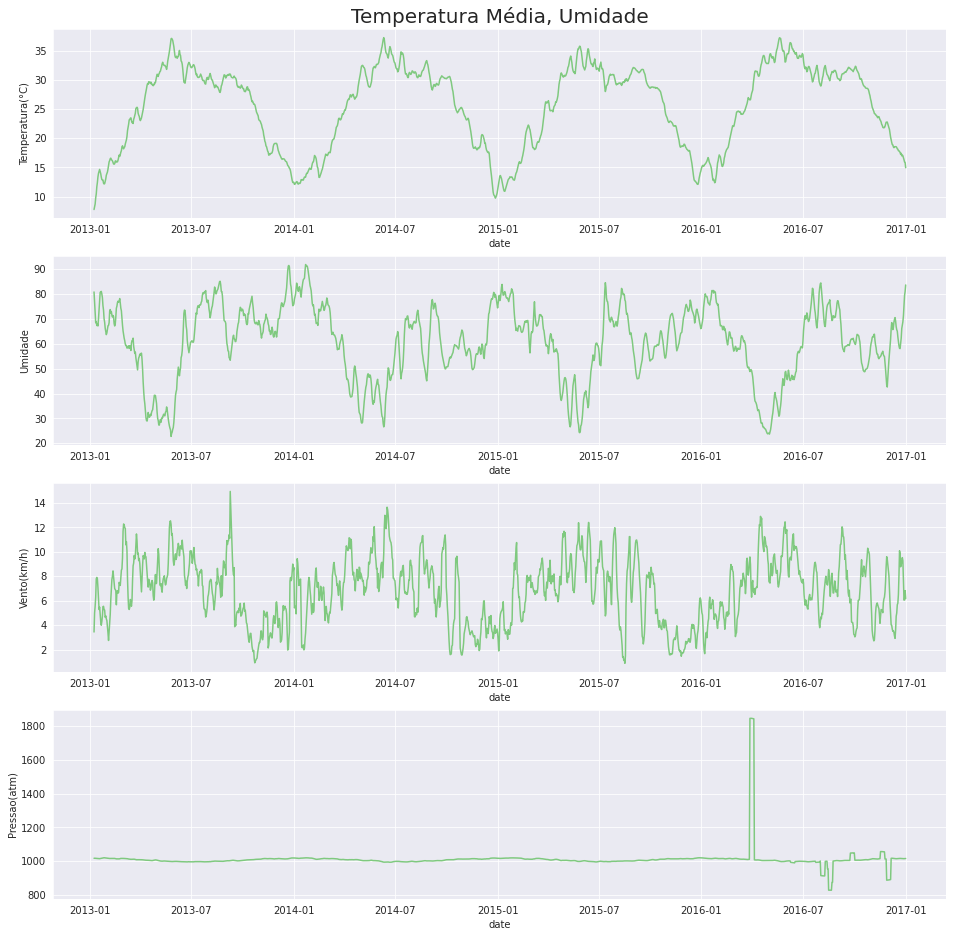

In [ ]:
dados['Umidade'] = dados['humidity'].rolling(8).mean()
dados['Vento(km/h)'] = dados['wind_speed'].rolling(8).mean()
dados['Pressao(atm)'] = dados['meanpressure'].rolling(8).mean()

plot_comparacao('date', 'Temperatura(°C)', 'Umidade', 
                'Vento(km/h)', 'Pressao(atm)', dados, 'Temperatura Média, Umidade')

Retornando às nossas perguntas da sessão anterior, e em busca de respostas, podemos notar que, inusitadamente, os maiores níveis de umidade estão acompanhados dos maiores níveis de temperatura e, em contrapartida, os menores níveis de umidade estão acompanhados dos menores níveis de temperatura.

Para uma análise mais profunda, em uma nova sessão, faremos uma análise de correlação das variáveis em questão.

## Análise de Correlação

**O que é correlação?**

Em probabilidade e estatística, correlação, dependência ou associação é qualquer relação estatística (causal ou não causal) entre duas variáveis e correlação é qualquer relação dentro de uma ampla classe de relações estatísticas que envolva dependência entre duas variáveis. Por exemplo, a correlação entre a estatura dos pais e a estatura dos pais e dos filhos. Embora seja comumente denotada como a medida de relação entre duas variáveis aleatórias, correlação não implica causalidade. Em alguns casos, correlação não identifica dependência entre as variáveis. Em geral, há pares de variáveis que apresentam forte dependência estatística, mas que possuem correlação nula. Para este casos, são utilizadas outras medidas de dependência.

Informalmente correlação é sinônimo de dependência. Formalmente variáveis são dependentes se não satisfizerem a propriedade matemática da independência probabilística. Em termos técnicos, correlação refere–se a qualquer um dos vários tipos específicos de relação entre os valores médios. Existem diferentes coeficientes de correlação ou para medir o grau de correlação. Um dos coeficientes de correlação mais conhecidos é o coeficiente de correlação de Pearson, obtido pela divisão da covariância de duas variáveis pelo produto dos seus desvios padrão e sensível a uma relação linear entre duas variáveis. Entretanto, há outros coeficientes de correlação mais robustos que o coeficiente de correlação de Pearson. Isto é, mais sensíveis às relações não lineares.


![Valores Correlação](https://d33wubrfki0l68.cloudfront.net/e3b158e0207e1a80248bc0d7283f6eee638d5e72/4f6f0/blog/correlacao_files/figure-html/unnamed-chunk-4-1.png)

Como visto na imagem acima, temos três divisões para o coeficiente de correlação, sendo:

* Quanto mais próximo de 1: correlação positiva forte. As variáveis são diretamente proporcionais.

* Quanto mais próximo de 0: correlação fraca. As variáveis não variam proporcionalmente.

* Quanto mais próximo de -1: correlação negativa forte. As variáveis são indiretamente proporcionais.



Agora, para a  análise de correlação, iremos abdicar do dataframe anterior, e continuar somente com as variáveis normalizadas que criamos.

In [ ]:
dados_normalizados = dados.drop(columns=['meantemp','humidity','wind_speed','meanpressure'])

Para a matriz de correlação, utilizaremos a função heatmap(), do seaborn.

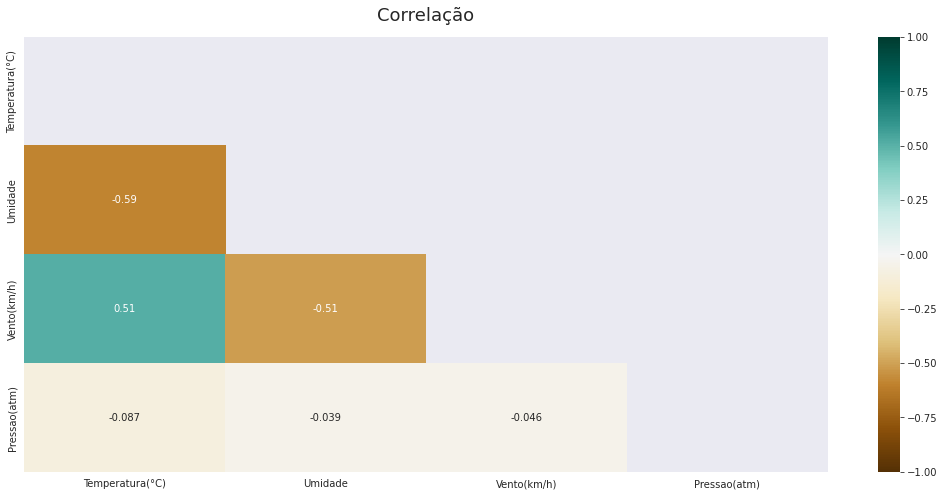

In [ ]:
plt.figure(figsize=(18, 8))
mask = np.triu(np.ones_like(dados_normalizados.corr(), dtype=bool))
heatmap = sns.heatmap(dados_normalizados.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlação', fontdict={'fontsize':18}, pad=16);

Como podemos notar, existem algumas correlações interessantes para nos ajudar com a modelagem do nosso problema. São elas:


* Temperatura e Velocidade do Vento:
> Coeficiente = 0.51 -> Correlação positiva.

* Temperatura e Umidade:
> Coeficiente = -0.59 -> Correlação negativa.

* Umidade e Velocidade do Vento:
> Coeficiente = -0.51 -> Correlação negativa.


# **2. Machine Learning**

In [ ]:
#Carregando Bibliotecas

#Modelagem
from sklearn.linear_model import LinearRegression

#Seleção de Características
from sklearn.model_selection import train_test_split

#Métricas de Avaliação
from sklearn.metrics import mean_absolute_error, r2_score